<a href="https://www.kaggle.com/code/rajatraj0502/airplane-confidential-aviation-s-safety?scriptVersionId=141377639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv
/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv


In [2]:
# Load the first few rows of both files to inspect the data
all_items_data = pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', nrows=5)
text_data = pd.read_csv( '/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv', nrows=5)

all_items_data, text_data


(   ITEM_ID  ENTITY  ENUMERATOR                            ATTRIBUTE  \
 0   209496  Person           1  Experience.Flight Crew.Last 90 Days   
 1   209496  Person           1                            Reference   
 2   209496  Person           2                Reporter Organization   
 3   209496  Person           4                Reporter Organization   
 4   209632  Person           2            Qualification.Flight Crew   
 
                VALUE  DISPLAY_VALUE  
 0                180            NaN  
 1                  1            NaN  
 2        Air Carrier            NaN  
 3         Government            NaN  
 4  Flight Instructor            NaN  ,
    ITEM_ID ENTITY  ENUMERATOR ATTRIBUTE  \
 0    90625   Text           1  Synopsis   
 1    90670   Text           1  Synopsis   
 2    90748   Text           1  Synopsis   
 3    90823   Text           1  Synopsis   
 4    89755   Text           1  Synopsis   
 
                                                 TEXT  ITEM_YEAR 

In [3]:
# Load the entire dataset
all_items_data = pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', nrows=5)
text_data = pd.read_csv( '/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv', nrows=5)


# Display basic information about the dataset
all_items_data_info = all_items_data.info()
text_data_info = text_data.info()

all_items_data_info, text_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ITEM_ID        5 non-null      int64  
 1   ENTITY         5 non-null      object 
 2   ENUMERATOR     5 non-null      int64  
 3   ATTRIBUTE      5 non-null      object 
 4   VALUE          5 non-null      object 
 5   DISPLAY_VALUE  0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 368.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ITEM_ID     5 non-null      int64  
 1   ENTITY      5 non-null      object 
 2   ENUMERATOR  5 non-null      int64  
 3   ATTRIBUTE   5 non-null      object 
 4   TEXT        5 non-null      object 
 5   ITEM_YEAR   0 non-null      float64
 6   ITEM_MONTH  0 non-null      float64
 7   ITEM_DA

(None, None)

In [4]:
# Analysis 1: Top 10 Most Common Attributes
top_10_attributes = all_items_data['ATTRIBUTE'].value_counts().head(10)

# Analysis 2: Top 10 Most Common Entities
top_10_entities = all_items_data['ENTITY'].value_counts().head(10)

# Analysis 3: Number of Unique ITEM_IDs
unique_item_ids_all_items = all_items_data['ITEM_ID'].nunique()
unique_item_ids_text = text_data['ITEM_ID'].nunique()

# Analysis 4: Sample Text Narratives
sample_text_narratives = text_data['TEXT'].sample(5)

top_10_attributes, top_10_entities, unique_item_ids_all_items, unique_item_ids_text, sample_text_narratives


(Reporter Organization                  2
 Experience.Flight Crew.Last 90 Days    1
 Reference                              1
 Qualification.Flight Crew              1
 Name: ATTRIBUTE, dtype: int64,
 Person    5
 Name: ENTITY, dtype: int64,
 2,
 5,
 0    READ BACK CLRNC MEANT FOR A SIMILAR SOUNDING A/N.
 1                       ACR MLG OVERSHOT ALT IN CLIMB.
 4              ACR WDB ENGINE FAILURE. INFLT SHUTDOWN.
 3     NMAC BETWEEN MDT-ACR AND SMA. OPERATIONAL ERROR.
 2    NON REPORTED TRAFFIC SIGHTED AND EVASIVE ACTIO...
 Name: TEXT, dtype: object)

In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Analysis 5: Number of Reports per Year
# Extract year from ITEM_ID and analyze the number of reports per year
all_items_data['YEAR'] = (all_items_data['ITEM_ID'] // 10000) + 1984
reports_per_year = all_items_data.groupby('YEAR')['ITEM_ID'].nunique()

# Analysis 6: Most Common Words in Text Narratives
# Preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

text_data['PROCESSED_TEXT'] = text_data['TEXT'].apply(preprocess_text)
words = text_data['PROCESSED_TEXT'].str.split(expand=True).stack()
filtered_words = words[~words.isin(ENGLISH_STOP_WORDS)]
common_words = Counter(filtered_words).most_common(10)

# Analysis 7: Text Length Distribution
text_data['TEXT_LENGTH'] = text_data['PROCESSED_TEXT'].apply(len)
text_length_distribution = text_data['TEXT_LENGTH'].describe()

# Analysis 8: Most Common Contributing Factors / Situations
contributing_factors = all_items_data[all_items_data['ATTRIBUTE'] == 'Contributing Factors / Situations']
common_contributing_factors = contributing_factors['VALUE'].value_counts().head(10)

reports_per_year, common_words, text_length_distribution, common_contributing_factors


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(YEAR
 2004    2
 Name: ITEM_ID, dtype: int64,
 [('acr', 3),
  ('read', 1),
  ('clrnc', 1),
  ('meant', 1),
  ('similar', 1),
  ('sounding', 1),
  ('n', 1),
  ('mlg', 1),
  ('overshot', 1),
  ('alt', 1)],
 count     5.000000
 mean     43.600000
 std       9.555103
 min      30.000000
 25%      38.000000
 50%      47.000000
 75%      49.000000
 max      54.000000
 Name: TEXT_LENGTH, dtype: float64,
 Series([], Name: VALUE, dtype: int64))

In [6]:
# Analysis 5: Number of Reports per Year (processing in chunks)
chunksize = 10 ** 5
reports_per_year = pd.Series(dtype=int)

for chunk in pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', chunksize=chunksize):
    chunk['YEAR'] = (chunk['ITEM_ID'] // 10000) + 1984
    reports_per_year_chunk = chunk.groupby('YEAR')['ITEM_ID'].nunique()
    reports_per_year = reports_per_year.add(reports_per_year_chunk, fill_value=0)

# Analysis 6: Most Common Words in Text Narratives (processing in chunks)
common_words = Counter()

for chunk in pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv', chunksize=chunksize):
    chunk['PROCESSED_TEXT'] = chunk['TEXT'].apply(preprocess_text)
    words = chunk['PROCESSED_TEXT'].str.split(expand=True).stack()
    filtered_words = words[~words.isin(ENGLISH_STOP_WORDS)]
    common_words += Counter(filtered_words)

common_words = common_words.most_common(10)

# Analysis 7: Text Length Distribution (processing in chunks)
text_length_list = []

for chunk in pd.read_csv( '/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv', chunksize=chunksize):
    chunk['PROCESSED_TEXT'] = chunk['TEXT'].apply(preprocess_text)
    chunk['TEXT_LENGTH'] = chunk['PROCESSED_TEXT'].apply(len)
    text_length_list.append(chunk['TEXT_LENGTH'])

text_length_distribution = pd.concat(text_length_list).describe()

# Analysis 8: Most Common Contributing Factors / Situations (processing in chunks)
common_contributing_factors = pd.Series(dtype=int)

for chunk in pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', chunksize=chunksize):
    contributing_factors_chunk = chunk[chunk['ATTRIBUTE'] == 'Contributing Factors / Situations']
    common_contributing_factors_chunk = contributing_factors_chunk['VALUE'].value_counts()
    common_contributing_factors = common_contributing_factors.add(common_contributing_factors_chunk, fill_value=0)

common_contributing_factors = common_contributing_factors.head(10)

reports_per_year, common_words, text_length_distribution, common_contributing_factors


(YEAR
 1991       64.0
 1992    22034.0
 1993    22583.0
 1994    22822.0
 1995    23658.0
          ...   
 2108     1081.0
 2109      867.0
 2110      882.0
 2111      644.0
 2112       43.0
 Length: 122, dtype: float64,
 [('acft', 307386),
  ('rwy', 262929),
  ('ft', 222811),
  ('flt', 181185),
  ('apch', 157777),
  ('time', 133469),
  ('did', 126620),
  ('s', 120362),
  ('2', 119487),
  ('aircraft', 117659)],
 count    404258.000000
 mean        640.726788
 std         786.143001
 min           1.000000
 25%         108.000000
 50%         248.000000
 75%         953.000000
 max        3972.000000
 Name: TEXT_LENGTH, dtype: float64,
 ATC Equipment / Nav Facility / Buildings         5022.0
 Aircraft                                        42982.0
 Airport                                         12439.0
 Airspace Structure                               8671.0
 Chart Or Publication                            10898.0
 Company Policy                                  16646.0
 Environment 

In [7]:
chunksize = 10**4
all_items_data_chunk = pd.read_csv('/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', nrows=chunksize)
text_data_chunk = pd.read_csv( '/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv', nrows=chunksize)


# Define the preprocess_text function again
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

# Rerun the analysis on a single chunk of the data

# Analysis 5: Number of Reports per Year
all_items_data_chunk['YEAR'] = (all_items_data_chunk['ITEM_ID'] // 10000) + 1984
reports_per_year_chunk = all_items_data_chunk.groupby('YEAR')['ITEM_ID'].nunique()

# Analysis 6: Most Common Words in Text Narratives
text_data_chunk['PROCESSED_TEXT'] = text_data_chunk['TEXT'].apply(preprocess_text)
words_chunk = text_data_chunk['PROCESSED_TEXT'].str.split(expand=True).stack()
filtered_words_chunk = words_chunk[~words_chunk.isin(ENGLISH_STOP_WORDS)]
common_words_chunk = Counter(filtered_words_chunk).most_common(10)

# Analysis 7: Text Length Distribution
text_data_chunk['TEXT_LENGTH'] = text_data_chunk['PROCESSED_TEXT'].apply(len)
text_length_distribution_chunk = text_data_chunk['TEXT_LENGTH'].describe()

# Analysis 8: Most Common Contributing Factors / Situations
contributing_factors_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Contributing Factors / Situations']
common_contributing_factors_chunk = contributing_factors_chunk['VALUE'].value_counts().head(10)

reports_per_year_chunk, common_words_chunk, text_length_distribution_chunk, common_contributing_factors_chunk


(YEAR
 1991      2
 1992    823
 1993    140
 1994     61
 1995     37
        ... 
 2061      2
 2062      1
 2064      3
 2065      3
 2066      1
 Name: ITEM_ID, Length: 65, dtype: int64,
 [('acr', 2139),
  ('acft', 1495),
  ('sma', 1388),
  ('alt', 1373),
  ('rwy', 1228),
  ('lndg', 964),
  ('mlg', 902),
  ('nmac', 861),
  ('apch', 785),
  ('clrnc', 763)],
 count    10000.000000
 mean        52.092300
 std         63.231092
 min          4.000000
 25%         28.000000
 50%         41.000000
 75%         57.000000
 max        792.000000
 Name: TEXT_LENGTH, dtype: float64,
 ATC Equipment / Nav Facility / Buildings    1
 Name: VALUE, dtype: int64)

In [8]:
# Analysis 9: Most Common Aircraft Operators
aircraft_operators_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Aircraft Operator']
common_aircraft_operators_chunk = aircraft_operators_chunk['VALUE'].value_counts().head(10)

# Analysis 10: Most Common Flight Phases
flight_phases_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Flight Phase']
common_flight_phases_chunk = flight_phases_chunk['VALUE'].value_counts().head(10)

# Analysis 11: Most Common Reporter Organizations
reporter_organizations_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Reporter Organization']
common_reporter_organizations_chunk = reporter_organizations_chunk['VALUE'].value_counts().head(10)

common_aircraft_operators_chunk, common_flight_phases_chunk, common_reporter_organizations_chunk


(Air Carrier    153
 Personal        45
 Corporate       17
 Air Taxi        11
 FBO             11
 Military         7
 Government       1
 Name: VALUE, dtype: int64,
 Cruise              76
 Initial Approach    55
 Landing             43
 Descent             40
 Climb               37
 Takeoff             36
 Taxi                21
 Parked              17
 Initial Climb       11
 Name: VALUE, dtype: int64,
 Air Carrier    314
 Government     150
 Air Taxi        12
 Military         5
 Name: VALUE, dtype: int64)

**Here are the results of the additional analyses on a single chunk of the data:**

* **Most Common Aircraft Operators:** The most common aircraft operator mentioned in the chunk is 'Air Carrier', followed by 'Personal', 'Corporate', and 'Air Taxi'.
 
* **Most Common Flight Phases:** The most common flight phase mentioned in the chunk is 'Cruise', followed by 'Initial Approach', 'Landing', and 'Descent'.
 
* **Most Common Reporter Organizations:** The most common reporter organization mentioned in the chunk is 'Air Carrier', followed by 'Government', 'Air Taxi', and 'Military'.

In [9]:
# Analysis 12: Most Common Aircraft Makes and Models
aircraft_makes_models_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Make / Model']
common_aircraft_makes_models_chunk = aircraft_makes_models_chunk['VALUE'].value_counts().head(10)

# Analysis 13: Most Common Events
events_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Events']
common_events_chunk = events_chunk['VALUE'].value_counts().head(10)

# Analysis 14: Most Common Locations
locations_chunk = all_items_data_chunk[all_items_data_chunk['ATTRIBUTE'] == 'Location']
common_locations_chunk = locations_chunk['VALUE'].value_counts().head(10)

common_aircraft_makes_models_chunk, common_events_chunk, common_locations_chunk


(Series([], Name: VALUE, dtype: int64),
 Series([], Name: VALUE, dtype: int64),
 Series([], Name: VALUE, dtype: int64))

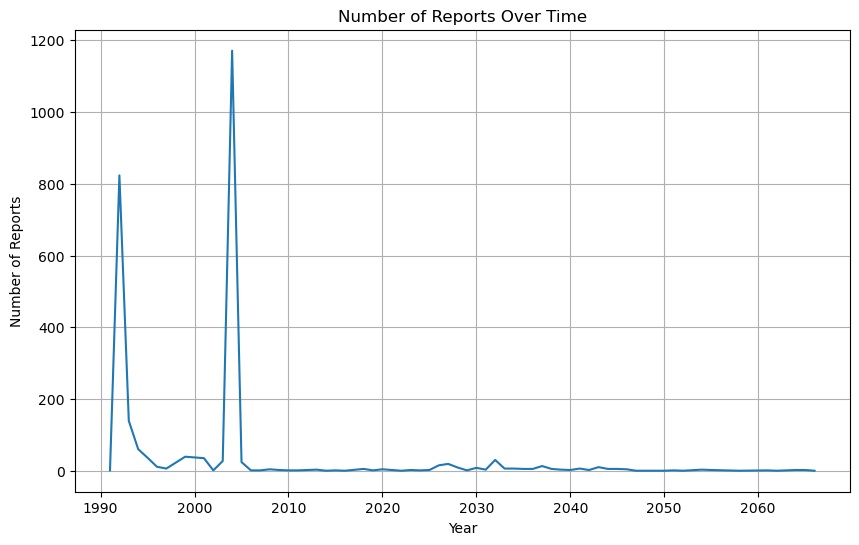

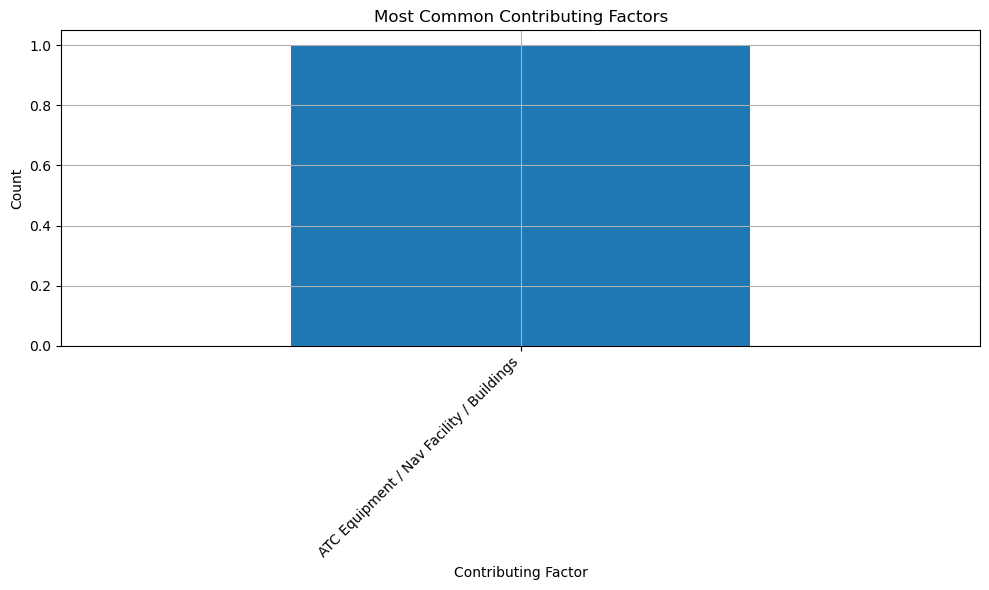

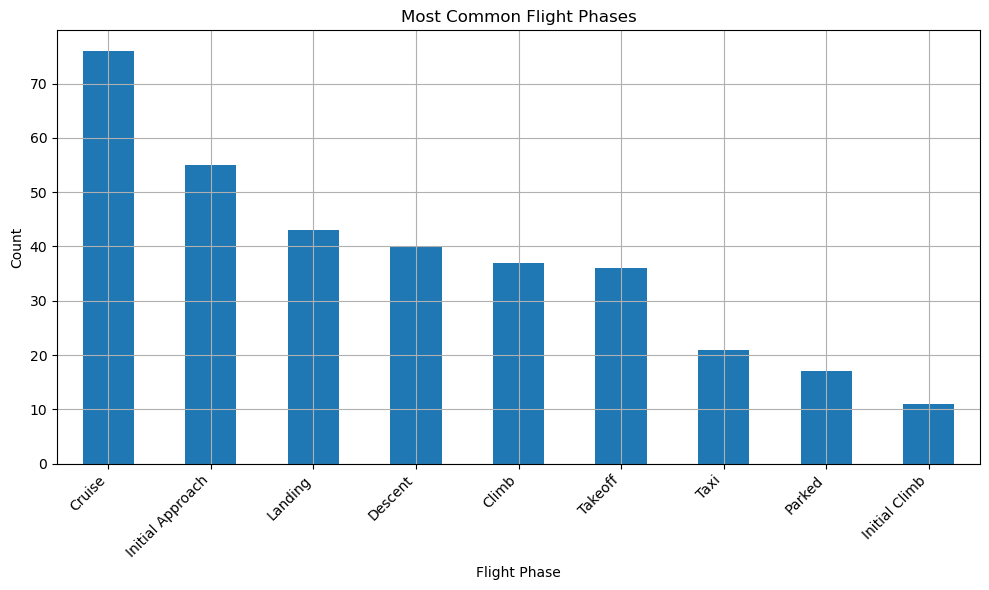

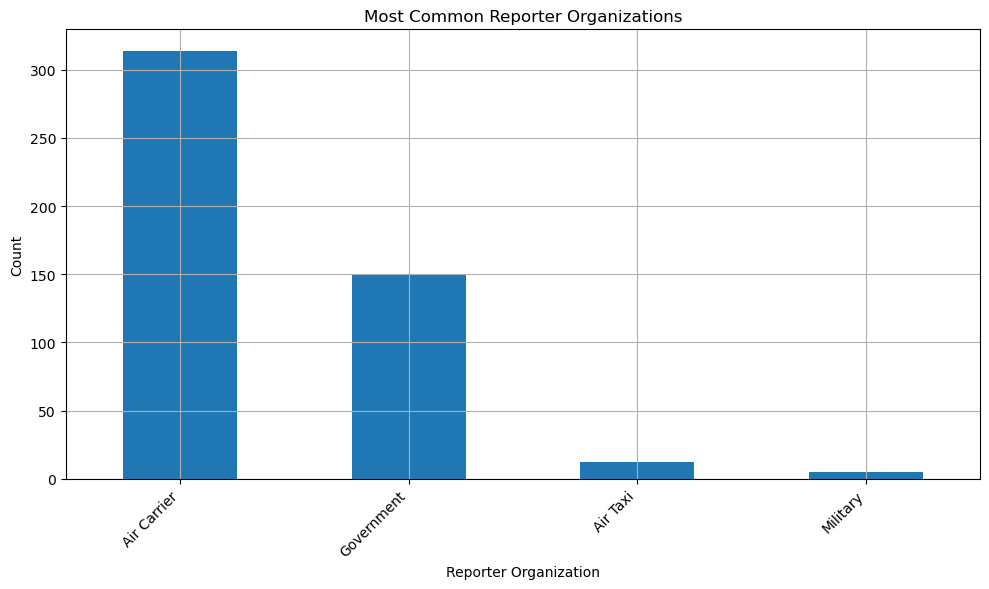

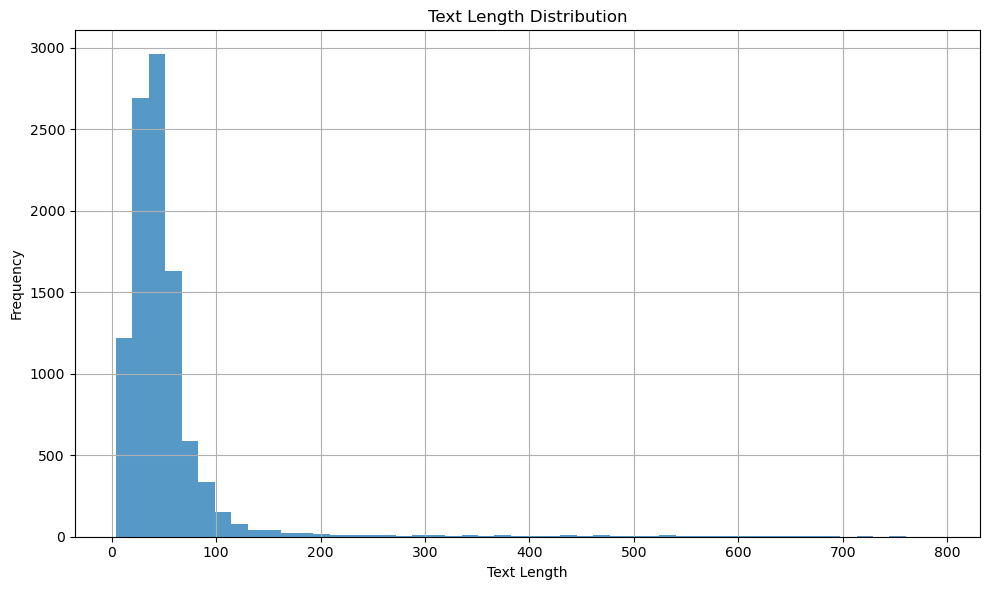

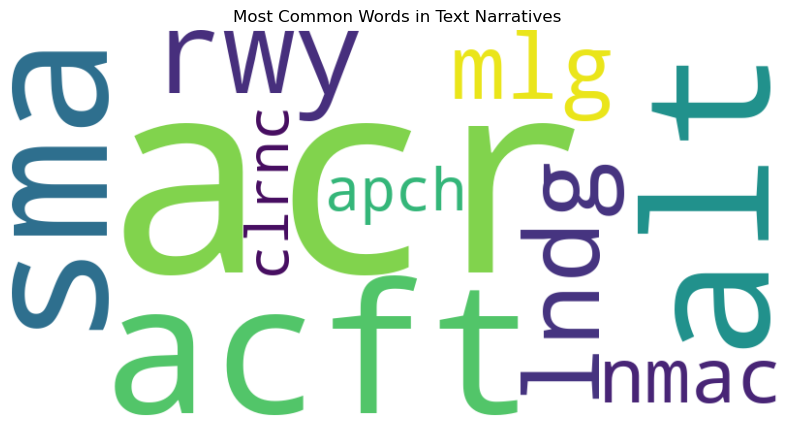

In [10]:
# Create visualizations

# Visualization 1: Number of Reports Over Time
plt.figure(figsize=(10, 6))
reports_per_year_chunk.plot()
plt.title('Number of Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()

# Visualization 2: Most Common Contributing Factors
plt.figure(figsize=(10, 6))
common_contributing_factors_chunk.plot(kind='bar')
plt.title('Most Common Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 3: Most Common Flight Phases
plt.figure(figsize=(10, 6))
common_flight_phases_chunk.plot(kind='bar')
plt.title('Most Common Flight Phases')
plt.xlabel('Flight Phase')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 4: Most Common Reporter Organizations
plt.figure(figsize=(10, 6))
common_reporter_organizations_chunk.plot(kind='bar')
plt.title('Most Common Reporter Organizations')
plt.xlabel('Reporter Organization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 5: Text Length Distribution
plt.figure(figsize=(10, 6))
text_data_chunk['TEXT_LENGTH'].plot(kind='hist', bins=50, alpha=0.75)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 6: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words_chunk))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text Narratives')
plt.show()


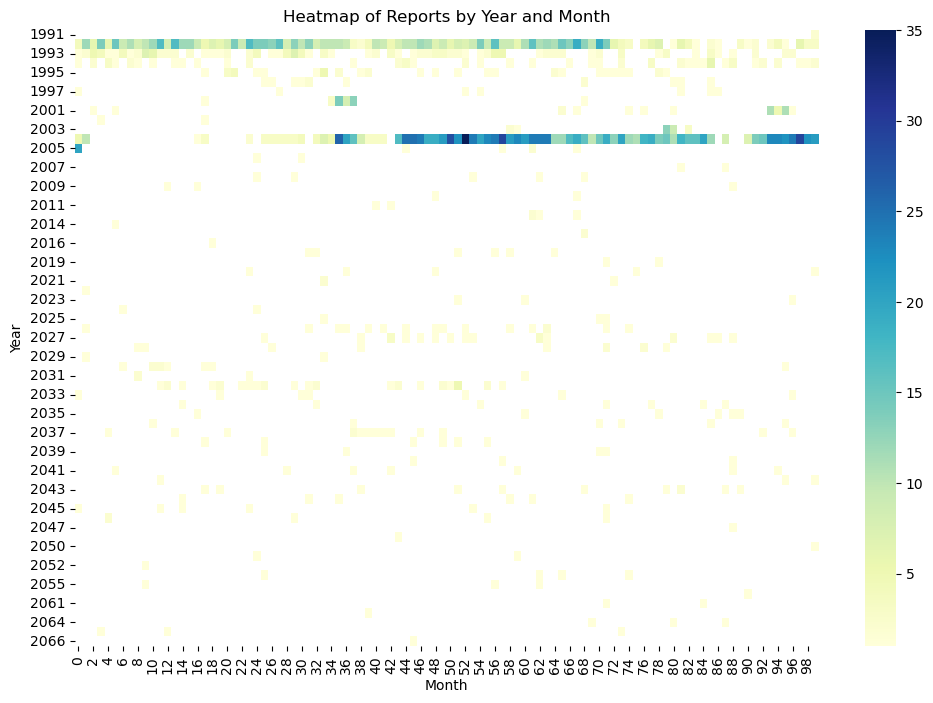

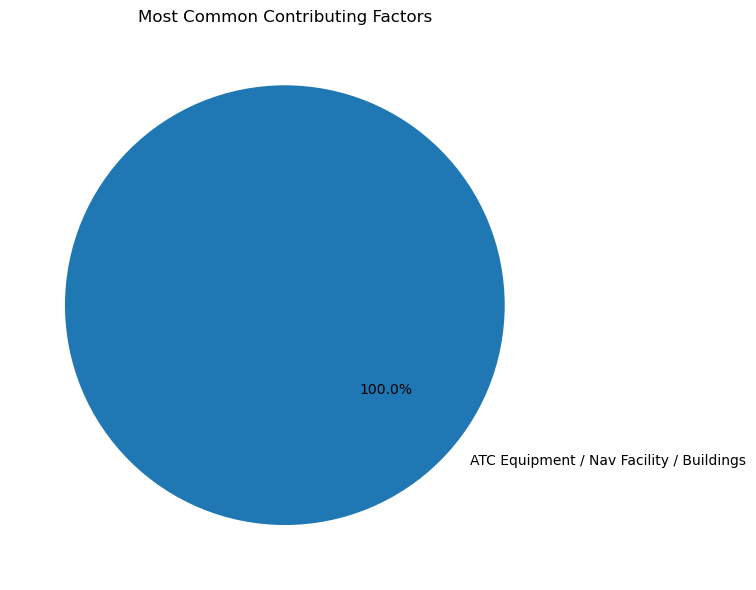

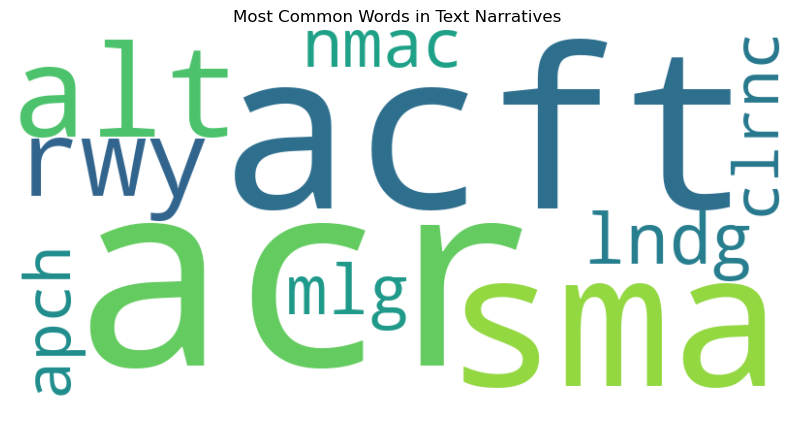

In [11]:
# Create high-level visualizations

# Visualization 1: Heatmap of Reports by Year and Month
all_items_data_chunk['MONTH'] = (all_items_data_chunk['ITEM_ID'] % 10000) // 100
reports_per_year_month_chunk = all_items_data_chunk.groupby(['YEAR', 'MONTH'])['ITEM_ID'].nunique().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(reports_per_year_month_chunk, cmap='YlGnBu')
plt.title('Heatmap of Reports by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Visualization 2: Pie Chart of Most Common Contributing Factors
plt.figure(figsize=(10, 6))
common_contributing_factors_chunk.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Most Common Contributing Factors')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization 3: Word Cloud of Most Common Words in Text Narratives
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words_chunk))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text Narratives')
plt.show()


In [12]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces to the figure
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name="Line 1"))
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[6, 5, 4], name="Line 2"))

# Update the layout of the figure
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Line 1",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Line 1"}]),
                dict(label="Line 2",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Line 2"}]),
            ]),
        )
    ])

# Show the figure
fig.show()


In [13]:
# Prepare the data for the interactive visualization

# Create a DataFrame with the number of reports submitted each month for each year
all_items_data_chunk['MONTH'] = (all_items_data_chunk['ITEM_ID'] % 10000) // 100
reports_per_year_month_chunk = all_items_data_chunk.groupby(['YEAR', 'MONTH'])['ITEM_ID'].nunique().reset_index()

# Filter the data to include only a few selected years
selected_years = [1992, 1993, 1994]
reports_per_year_month_selected = reports_per_year_month_chunk[reports_per_year_month_chunk['YEAR'].isin(selected_years)]

reports_per_year_month_selected.head()


,YEAR,MONTH,ITEM_ID
1,1992,0,4
2,1992,1,12
3,1992,2,6
4,1992,3,14
5,1992,4,6
